In [1]:
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 85
model name	: Intel(R) Xeon(R) CPU @ 2.00GHz
stepping	: 3
microcode	: 0x1
cpu MHz		: 2000.140
cache size	: 39424 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm mpx avx512f avx512dq rdseed adx smap clflushopt clwb avx512cd avx512bw avx512vl xsaveopt xsavec xgetbv1 xsaves arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs taa
bogomips	:

In [2]:
import numpy as np
import pandas as pd

yield_df = pd.read_csv('/content/yield_rainfall_merged.csv')
yield_df    

,State_Name,Crop_Year,Season,Crop,tonnes/hectare_yield,rainfall_mm
0,Andaman and Nicobar Islands,2000,Kharif,Arecanut,1.594896,1565.40
1,Andaman and Nicobar Islands,2000,Kharif,Other Kharif pulses,0.500000,1565.40
2,Andaman and Nicobar Islands,2000,Kharif,Rice,3.147059,1565.40
3,Andaman and Nicobar Islands,2000,Whole Year,Banana,3.642045,2763.20
4,Andaman and Nicobar Islands,2000,Whole Year,Cashewnut,0.229167,2763.20
...,...,...,...,...,...,...
245210,West Bengal,2014,Summer,Rice,2.617647,769.75
245211,West Bengal,2014,Summer,Sesamum,0.738437,769.75
245212,West Bengal,2014,Whole Year,Sugarcane,50.154321,2422.70
245213,West Bengal,2014,Winter,Rice,2.141848,61.05


In [3]:
yield_df.isnull().sum()

State_Name                 0
Crop_Year                  0
Season                     0
Crop                       0
tonnes/hectare_yield    3726
rainfall_mm             1171
dtype: int64

In [4]:
yield_df.dropna(inplace = True)

In [5]:
yield_df.isnull().sum()

State_Name              0
Crop_Year               0
Season                  0
Crop                    0
tonnes/hectare_yield    0
rainfall_mm             0
dtype: int64

In [62]:
yield_df['Crop'].unique()

array(['Arecanut', 'Other Kharif pulses', 'Rice', 'Banana', 'Cashewnut',
       'Coconut ', 'Dry ginger', 'Sugarcane', 'Sweet potato', 'Tapioca',
       'Black pepper', 'Dry chillies', 'other oilseeds', 'Turmeric',
       'Maize', 'Moong(Green Gram)', 'Urad', 'Arhar/Tur', 'Groundnut',
       'Sunflower', 'Bajra', 'Castor seed', 'Cotton(lint)', 'Horse-gram',
       'Jowar', 'Korra', 'Ragi', 'Tobacco', 'Gram', 'Wheat', 'Masoor',
       'Sesamum', 'Linseed', 'Safflower', 'Onion', 'other misc. pulses',
       'Samai', 'Small millets', 'Coriander', 'Potato',
       'Other  Rabi pulses', 'Soyabean', 'Beans & Mutter(Vegetable)',
       'Bhindi', 'Brinjal', 'Citrus Fruit', 'Cucumber', 'Grapes', 'Mango',
       'Orange', 'other fibres', 'Other Fresh Fruits', 'Other Vegetables',
       'Papaya', 'Pome Fruit', 'Tomato', 'Mesta', 'Cowpea(Lobia)',
       'Lemon', 'Pome Granet', 'Sapota', 'Cabbage', 'Rapeseed &Mustard',
       'Peas  (vegetable)', 'Niger seed', 'Bottle Gourd', 'Varagu',
       'Garl

In [6]:
yield_df.groupby('Crop').count()

,State_Name,Crop_Year,Season,tonnes/hectare_yield,rainfall_mm
Crop,,,,,
Apple,4,4,4,4,4
Arcanut (Processed),20,20,20,20,20
Arecanut,1506,1506,1506,1506,1506
Arhar/Tur,7476,7476,7476,7476,7476
Ash Gourd,44,44,44,44,44
...,...,...,...,...,...
Wheat,7819,7819,7819,7819,7819
Yam,36,36,36,36,36
other fibres,10,10,10,10,10


In [7]:
yield_df.describe()

,Crop_Year,tonnes/hectare_yield,rainfall_mm
count,240323.000000,240323.000000,240323.000000
mean,2005.619508,39.204104,1021.123925
std,4.952495,799.805763,1173.891465
min,1997.000000,0.000000,0.000000
25%,2002.000000,0.513158,174.700000
50%,2006.000000,1.000000,773.700000
75%,2010.000000,2.341753,1316.000000
max,2015.000000,88000.000000,6229.200000


In [8]:
yield_df['State_Name'].nunique()

32

In [9]:
yield_df['Crop'].nunique()

124

The dataframe has 32 States, ordering these by 10 the highest yield production: 

In [10]:
yield_df.groupby(['State_Name'],sort=True)['tonnes/hectare_yield'].sum().nlargest(10)

State_Name
Assam                          2.173275e+06
Andhra Pradesh                 1.865720e+06
Kerala                         1.526233e+06
Punjab                         1.086707e+06
Tamil Nadu                     8.661052e+05
Telangana                      5.658708e+05
West Bengal                    5.118542e+05
Uttar Pradesh                  1.753920e+05
Karnataka                      8.867782e+04
Andaman and Nicobar Islands    6.905418e+04
Name: tonnes/hectare_yield, dtype: float64

In [11]:
yield_df.groupby(['Crop','State_Name'],sort=True)['tonnes/hectare_yield'].sum().nlargest(10)

Crop       State_Name                 
Coconut    Assam                          2.118070e+06
           Andhra Pradesh                 1.806520e+06
           Kerala                         1.497896e+06
Sugarcane  Punjab                         1.080660e+06
Coconut    Tamil Nadu                     7.139919e+05
           Telangana                      5.390737e+05
           West Bengal                    4.637929e+05
Sugarcane  Tamil Nadu                     7.872587e+04
Coconut    Andaman and Nicobar Islands    6.832828e+04
Sugarcane  Uttar Pradesh                  6.689664e+04
Name: tonnes/hectare_yield, dtype: float64

In [12]:
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

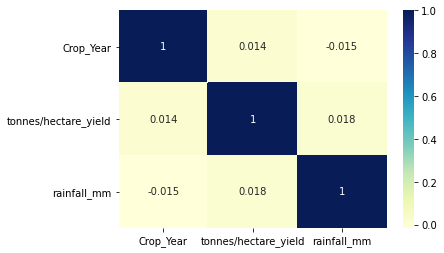

In [13]:
correlation_data=yield_df.select_dtypes(include=[np.number]).corr()
dataplot = sns.heatmap(correlation_data, cmap="YlGnBu", annot=True)

It can be seen from the above correlation map that there is no correlation between any of the colmuns in the dataframe.

In [14]:
yield_df.head()

,State_Name,Crop_Year,Season,Crop,tonnes/hectare_yield,rainfall_mm
0,Andaman and Nicobar Islands,2000,Kharif,Arecanut,1.594896,1565.4
1,Andaman and Nicobar Islands,2000,Kharif,Other Kharif pulses,0.500000,1565.4
2,Andaman and Nicobar Islands,2000,Kharif,Rice,3.147059,1565.4
3,Andaman and Nicobar Islands,2000,Whole Year,Banana,3.642045,2763.2
4,Andaman and Nicobar Islands,2000,Whole Year,Cashewnut,0.229167,2763.2


In [15]:
from sklearn.preprocessing import OneHotEncoder

In [16]:
yield_df_onehot = pd.get_dummies(yield_df, columns=['State_Name',"Crop", "Season"], prefix = ['State',"Crop","Season"])
features=yield_df_onehot.loc[:, yield_df_onehot.columns != 'tonnes/hectare_yield']
label=yield_df['tonnes/hectare_yield']
features.head()

,Crop_Year,rainfall_mm,State_Andaman and Nicobar Islands,State_Andhra Pradesh,State_Arunachal Pradesh,State_Assam,State_Bihar,State_Chandigarh,State_Chhattisgarh,State_Dadra and Nagar Haveli,State_Goa,State_Gujarat,State_Haryana,State_Himachal Pradesh,State_Jammu and Kashmir,State_Jharkhand,State_Karnataka,State_Kerala,State_Madhya Pradesh,State_Maharashtra,State_Manipur,State_Meghalaya,State_Mizoram,State_Nagaland,State_Odisha,State_Punjab,State_Rajasthan,State_Sikkim,State_Tamil Nadu,State_Telangana,State_Tripura,State_Uttar Pradesh,State_Uttarakhand,State_West Bengal,Crop_Apple,Crop_Arcanut (Processed),Crop_Arecanut,Crop_Arhar/Tur,Crop_Ash Gourd,Crop_Atcanut (Raw),...,Crop_Ragi,Crop_Rajmash Kholar,Crop_Rapeseed &Mustard,Crop_Redish,Crop_Ribed Guard,Crop_Rice,Crop_Ricebean (nagadal),Crop_Rubber,Crop_Safflower,Crop_Samai,Crop_Sannhamp,Crop_Sapota,Crop_Sesamum,Crop_Small millets,Crop_Snak Guard,Crop_Soyabean,Crop_Sugarcane,Crop_Sunflower,Crop_Sweet potato,Crop_Tapioca,Crop_Tea,Crop_Tobacco,Crop_Tomato,Crop_Total foodgrain,Crop_Turmeric,Crop_Turnip,Crop_Urad,Crop_Varagu,Crop_Water Melon,Crop_Wheat,Crop_Yam,Crop_other fibres,Crop_other misc. pulses,Crop_other oilseeds,Season_Autumn,Season_Kharif,Season_Rabi,Season_Summer,Season_Whole Year,Season_Winter
0,2000,1565.4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,2000,1565.4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,2000,1565.4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,2000,2763.2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,2000,2763.2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [17]:
features = features.drop(['Crop_Year'], axis=1)

In [18]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 240323 entries, 0 to 245214
Columns: 163 entries, rainfall_mm to Season_Winter
dtypes: float64(1), uint8(162)
memory usage: 40.8 MB


In [19]:
features.head()

,rainfall_mm,State_Andaman and Nicobar Islands,State_Andhra Pradesh,State_Arunachal Pradesh,State_Assam,State_Bihar,State_Chandigarh,State_Chhattisgarh,State_Dadra and Nagar Haveli,State_Goa,State_Gujarat,State_Haryana,State_Himachal Pradesh,State_Jammu and Kashmir,State_Jharkhand,State_Karnataka,State_Kerala,State_Madhya Pradesh,State_Maharashtra,State_Manipur,State_Meghalaya,State_Mizoram,State_Nagaland,State_Odisha,State_Punjab,State_Rajasthan,State_Sikkim,State_Tamil Nadu,State_Telangana,State_Tripura,State_Uttar Pradesh,State_Uttarakhand,State_West Bengal,Crop_Apple,Crop_Arcanut (Processed),Crop_Arecanut,Crop_Arhar/Tur,Crop_Ash Gourd,Crop_Atcanut (Raw),Crop_Bajra,...,Crop_Ragi,Crop_Rajmash Kholar,Crop_Rapeseed &Mustard,Crop_Redish,Crop_Ribed Guard,Crop_Rice,Crop_Ricebean (nagadal),Crop_Rubber,Crop_Safflower,Crop_Samai,Crop_Sannhamp,Crop_Sapota,Crop_Sesamum,Crop_Small millets,Crop_Snak Guard,Crop_Soyabean,Crop_Sugarcane,Crop_Sunflower,Crop_Sweet potato,Crop_Tapioca,Crop_Tea,Crop_Tobacco,Crop_Tomato,Crop_Total foodgrain,Crop_Turmeric,Crop_Turnip,Crop_Urad,Crop_Varagu,Crop_Water Melon,Crop_Wheat,Crop_Yam,Crop_other fibres,Crop_other misc. pulses,Crop_other oilseeds,Season_Autumn,Season_Kharif,Season_Rabi,Season_Summer,Season_Whole Year,Season_Winter
0,1565.4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,1565.4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,1565.4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,2763.2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,2763.2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [20]:
#Scaling
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
features=scaler.fit_transform(features) 

In [21]:
features

array([[0.25130033, 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.25130033, 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.25130033, 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.38892635, 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.00980062, 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.00980062, 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [22]:
#test-train split
from sklearn.model_selection import train_test_split
train_data, test_data, train_labels, test_labels = train_test_split(features, label, test_size=0.3, random_state=42)

In [23]:
#Model Comparison & Selection
from sklearn.metrics import r2_score
def compare_models(model):
    model_name = model.__class__.__name__
    fit=model.fit(train_data,train_labels)
    y_pred=fit.predict(test_data)
    r2=r2_score(test_labels,y_pred)
    return([model_name,r2])

In [31]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import LinearSVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import SGDRegressor

models = [
    GradientBoostingRegressor(n_estimators=200, max_depth=3, random_state=0),
    RandomForestRegressor(n_estimators=200, max_depth=3, random_state=0),
    LinearSVR(),
    SGDRegressor(),
    DecisionTreeRegressor()
]

In [32]:
model_train=list(map(compare_models,models)) 

In [33]:
print(*model_train, sep = "\n")

['GradientBoostingRegressor', 0.9112774204934756]
['RandomForestRegressor', 0.7789212258256166]
['LinearSVR', 0.00041528337030771745]
['SGDRegressor', 0.16893003831597742]
['DecisionTreeRegressor', 0.9234809218684481]


In [39]:
model = DecisionTreeRegressor()
fit=model.fit(train_data,train_labels)
y_pred=fit.predict(test_data)
r2=r2_score(test_labels,y_pred)

In [40]:
r2

0.9234809216718158

Feature: 0, Score: 0.71003
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.04017
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00274
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00106
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00005
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00224
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00850
Feature: 28, Score: 0.01518
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.01165
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score: 0.00000
Fe

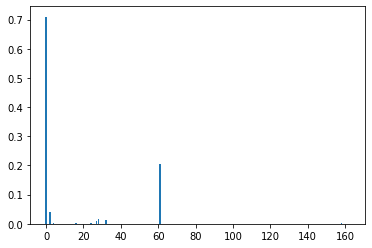

In [43]:
import matplotlib
from matplotlib import pyplot

importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()


#Input Processing for testing

In [93]:
import copy
max_rain = yield_df['rainfall_mm'].max()
min_rain = yield_df['rainfall_mm'].min()

input_test = {'rainfall_mm': 15, 'State_Name': 'Bihar', 'Season': 'Rabi', 'Crop': 'Linseed'}
test_data_copy = copy.deepcopy(yield_df_onehot.head(2))

test_data_copy.drop(columns="tonnes/hectare_yield", inplace=True)

In [94]:
test_data_copy.drop(labels=[0,1], inplace = True)

In [95]:
test_data_copy.loc[len(test_data_copy)] = 0
test_data_copy

,rainfall_mm,State_Andaman and Nicobar Islands,State_Andhra Pradesh,State_Arunachal Pradesh,State_Assam,State_Bihar,State_Chandigarh,State_Chhattisgarh,State_Dadra and Nagar Haveli,State_Goa,State_Gujarat,State_Haryana,State_Himachal Pradesh,State_Jammu and Kashmir,State_Jharkhand,State_Karnataka,State_Kerala,State_Madhya Pradesh,State_Maharashtra,State_Manipur,State_Meghalaya,State_Mizoram,State_Nagaland,State_Odisha,State_Punjab,State_Rajasthan,State_Sikkim,State_Tamil Nadu,State_Telangana,State_Tripura,State_Uttar Pradesh,State_Uttarakhand,State_West Bengal,Crop_Apple,Crop_Arcanut (Processed),Crop_Arecanut,Crop_Arhar/Tur,Crop_Ash Gourd,Crop_Atcanut (Raw),Crop_Bajra,...,Crop_Ragi,Crop_Rajmash Kholar,Crop_Rapeseed &Mustard,Crop_Redish,Crop_Ribed Guard,Crop_Rice,Crop_Ricebean (nagadal),Crop_Rubber,Crop_Safflower,Crop_Samai,Crop_Sannhamp,Crop_Sapota,Crop_Sesamum,Crop_Small millets,Crop_Snak Guard,Crop_Soyabean,Crop_Sugarcane,Crop_Sunflower,Crop_Sweet potato,Crop_Tapioca,Crop_Tea,Crop_Tobacco,Crop_Tomato,Crop_Total foodgrain,Crop_Turmeric,Crop_Turnip,Crop_Urad,Crop_Varagu,Crop_Water Melon,Crop_Wheat,Crop_Yam,Crop_other fibres,Crop_other misc. pulses,Crop_other oilseeds,Season_Autumn,Season_Kharif,Season_Rabi,Season_Summer,Season_Whole Year,Season_Winter
0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [96]:
test_data_copy['rainfall_mm'].iloc[0] = (input_test['rainfall_mm'] - min_rain) / (max_rain - min_rain)
test_data_copy['State_' + input_test['State_Name']].iloc[0] = 1
test_data_copy['Season_' + input_test['Season']].iloc[0] = 1
test_data_copy['Crop_' + input_test['Crop']].iloc[0] = 1

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [97]:
np.array(test_data_copy)

array([[0.00240801, 0.        , 0.        , 0.        , 0.        ,
        1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

In [98]:
ans = fit.predict(np.array(test_data_copy))
ans

array([0.81133362])